# DS1 Final Project
## Product College 2018 Applicants Data

Miki Nomura

# Data Basics

- __1226__ Applications Data for Fall 2018

- Exported from __Hubspot__ - one of the popular CRM (Customer Relationship Management) tools. 

- Out of 1226, __234__ were admitted

- Out of 234, __91__ checked in on the day 1 of the program


Features:
1. Demographics (Gender, Location, Age etc) 
1. Marketing Data (Email Open Rates, Website Visits, Where they come from etc)
1. Application Data (Character Counts, Coding Level, Current Applicant Stage (Pending Admissions Decision, Admitted etc))

__381__ features in total (too many..)

# Objective

## Recruit more students!

### First, we want to understand where we're now. 

To get more students for Fall 2019, we've been doing a lot of initiatives, and we started getting applications. But, it takes time to know how many will be actually admitted, and how many will come to the program. So, as the Growht Lead, I want to know:

- When we get applications: Out of the total applications, how many applicants looks qualified to be admitted? (or how many doesn't look qualified.
- When we admit students: How many admits will actually show up in the day 1?


# Questions

- What features make the difference between applicants and admits?
- What features make the difference between admits and attendees?

# Insights

1. __Character counts__ are different between admits and non-admits, but _not_ between attendees and non-attendees.
1. There is _no_ difference in __Email Open Counts and Click Counts__ between attendees and non-attendees.
1. There is a difference in __Website Visits and Page Views__ between attendees and non-attendees.

## Methods
- Histograms
- T Tests

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

FILEPATH = 'Datasets/contacts.csv'
df = pd.read_csv(FILEPATH)

FILEPATH_SEP = 'Datasets/ISA Submitted applications As of Sep 6, 2018.csv'
df_sep = pd.read_csv(FILEPATH_SEP)
df_sep_counts = df_sep[["Contact ID", "Total Character Count", "PC Character Count", "Number of Pageviews"]]

## Merge
df = df.merge(df_sep_counts[["Contact ID","Total Character Count", "PC Character Count", "Number of Pageviews"]], on="Contact ID", how="left")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,20,34,36,39,53,54,79,83,84,87,89,94,96,100,106,107,108,113,117,118,119,128,131,136,150,151,152,153,154,155,156,171,173,187,200,202,206,207,235,240,242,243,245,251,254,257,259,265,266,271,277,304,306,334,335,336,337,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,378,379,380,381,382,383,384,385,386,387,388,390,391,394,395,396,399,400,401,404,405,406,407,408,410,413,414,415,418,420,421,424,425,426,427,431,439,440,442,443,444,445,446,449,450,451,452,453,454,456,457,461,462,465,469,470,480,481,484,486,489,490,492,497,498,506,508,510,511,512,513,514,515,518,519,520,521,522,523,524,525,526,527,529,530,531,532,533,534,535,536,537,538,541,544,548,549,550,551,553,554,555,557,558,560,565,567,568,570,572,573,574,575,576,577,579,580,582,583,584,586,587,588,589,590,593,594,598,599,600,602,603,604,605,606,608,613,614,61

In [2]:
# Clean up
for column in df:
    if df[column].isna().sum() > 1200:
        df.drop([column], 1, inplace=True)

In [3]:
# privacy reason
df.drop(["Email"], 1, inplace=True)
print(len(df.columns))

381


In [4]:
# Many Features!
for column in df:
    print(column)

Contact ID
2018 - Interview Outcome
2018 PC Accreditation Webinar Attended Date
Are you ready to make a commitment to attend Make School?
Associated Deals
Birth Month
CS Info Session Dates
Contact Type (Prospective, Current Student, Alumni)
Contact priority
Currently in Sequence
Days To Close
First Deal Created Date
Last Modified Date
Likelihood to close
Owner Assigned Date
Please identify any credits you will be seeking to apply towards the Product College.
Recent Sales Email Clicked Date
Recent Sales Email Opened Date
Year 2018 PC Enrollment Checklist
Year 2018 SA Enrollment Housing
Year 2018 SA Enrollment Post Summer
Year 2018 SA Scholarship Interest
Owner ID
Last Activity Date
Last Contacted
Last Meeting Booked
Number of Sales Activities
Number of times contacted
Recent Sales Email Replied Date
Street Address
City
State/Region
Postal Code
Country
Close Date
Became a Lead Date
Became a Marketing Qualified Lead Date
Became an Opportunity Date
Date Of Birth
Lifecycle Stage
Became a Sa

In [5]:
# Clean up
df["Year 2018 Applications Admitted"] = df["Year 2018 Applications Admitted"].apply(lambda x: "San Francisco Product College Track; San Francisco Summer Academy" if x == "San Francisco Summer Academy; San Francisco Product College Track" else x)
df["Year 2018 Applications Admitted"] = df["Year 2018 Applications Admitted"].fillna("No Program")
df["Year 2018 PC Enrollment Agreement Signed"] = df["Year 2018 PC Enrollment Agreement Signed"].fillna(False)
df["2018 PC Checked-In"] = df["2018 PC Checked-In"].fillna("None")
df["2018 PC Checked-In"] = df["2018 PC Checked-In"].apply(lambda x: "Yes" if x == "1534723200000" else x)
df["utm_campaign"] = df["utm_campaign"].fillna("No Data")
df["Original Source Type"] = df["Original Source Type"].fillna("No Data")
df["Original Source Data 1"] = df["Original Source Data 1"].fillna("No Data")

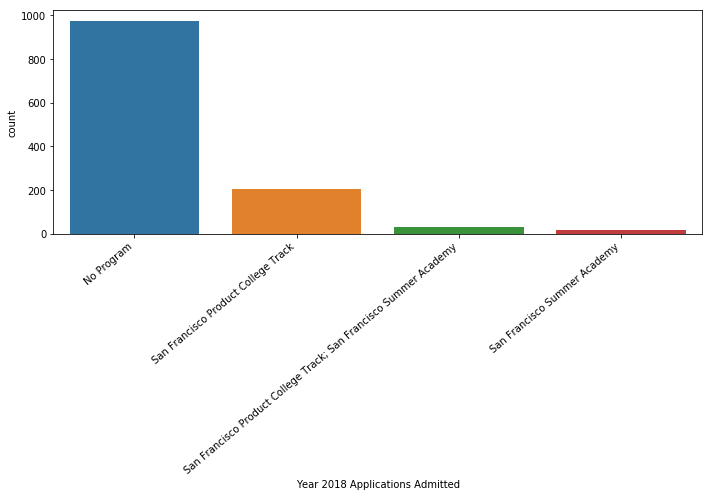

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(x="Year 2018 Applications Admitted", data=df, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# How I can add the number at the top of the bar?

In [7]:
# How many people were admitted to the programs (PC or SA) ?
pd.pivot_table(df,index=["Year 2018 Applications Admitted"],values=["Contact ID"],aggfunc=len, margins=True)

# 234 were admitted

,Contact ID
Year 2018 Applications Admitted,
No Program,976
San Francisco Product College Track,203
San Francisco Product College Track; San Francisco Summer Academy,31
San Francisco Summer Academy,16
All,1226


In [8]:
# How many people checked in?
pd.pivot_table(df,index=["Year 2018 Applications Admitted"],columns=["2018 PC Checked-In"], values=["Contact ID"],aggfunc=len, margins=True)

# Out of 234, 91 came

Contact ID  \
2018 PC Checked-In                                 Melt (After check-in)   
Year 2018 Applications Admitted                                            
No Program                                                           NaN   
San Francisco Product College Track                                  1.0   
San Francisco Product College Track; San Franci...                   1.0   
San Francisco Summer Academy                                         NaN   
All                                                                  2.0   

                                                                        
2018 PC Checked-In                                    None   Yes   All  
Year 2018 Applications Admitted                                         
No Program                                           976.0   NaN   976  
San Francisco Product College Track                  127.0  75.0   203  
San Francisco Product College Track; San Franci...    14.0  16.0    31  
San Francisco Summer Academy                          16.0   NaN    16  
All                                                 1133.0  91.0  1226

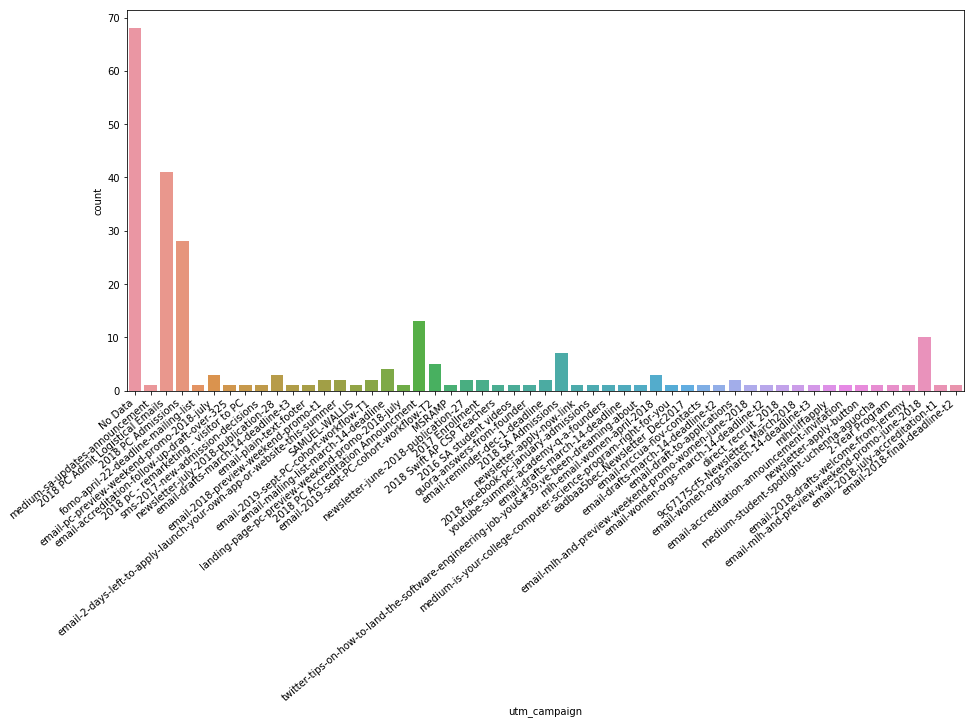

In [9]:
# Where are they coming from?
fig, ax = plt.subplots(figsize=(15,7))
sb.countplot(x="utm_campaign", data=df[df["Year 2018 Applications Admitted"].str.contains("Product College")])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

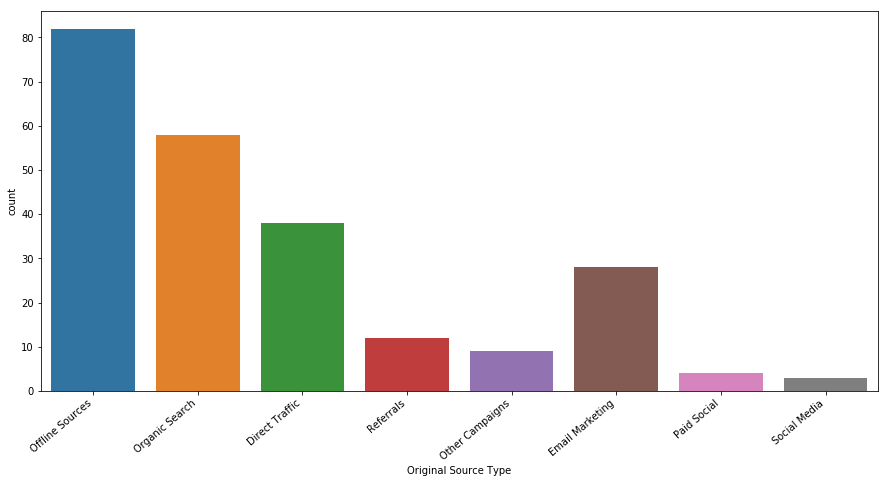

In [10]:
# Where are they coming from?
fig, ax = plt.subplots(figsize=(15,7))
sb.countplot(x="Original Source Type", data=df[df["Year 2018 Applications Admitted"].str.contains("Product College")])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

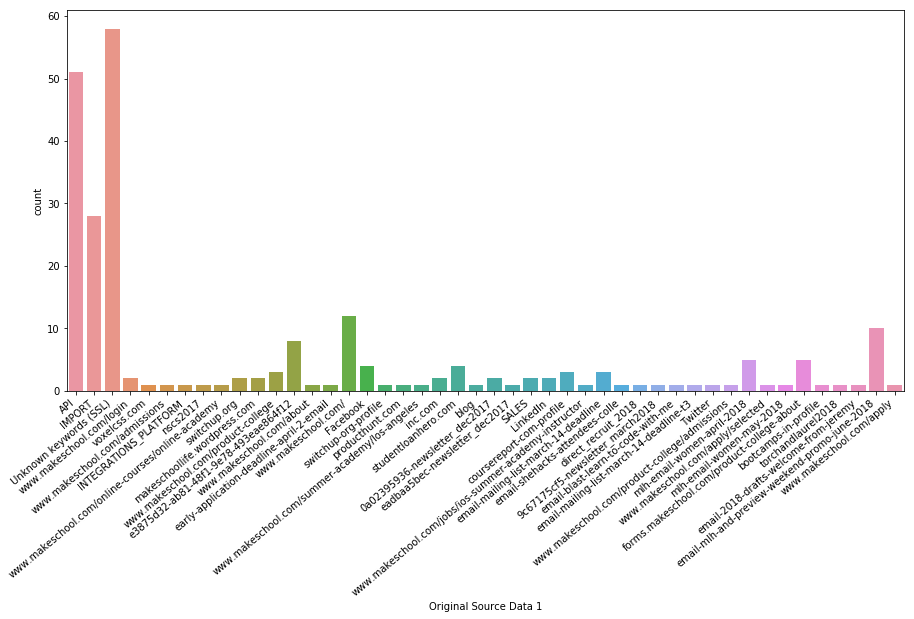

In [11]:
# Where are they coming from?
fig, ax = plt.subplots(figsize=(15,7))
sb.countplot(x="Original Source Data 1", data=df[df["Year 2018 Applications Admitted"].str.contains("Product College")])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Key Feature 1: Character Count

Text(0.5,1,'Character Count of Non-Admits')

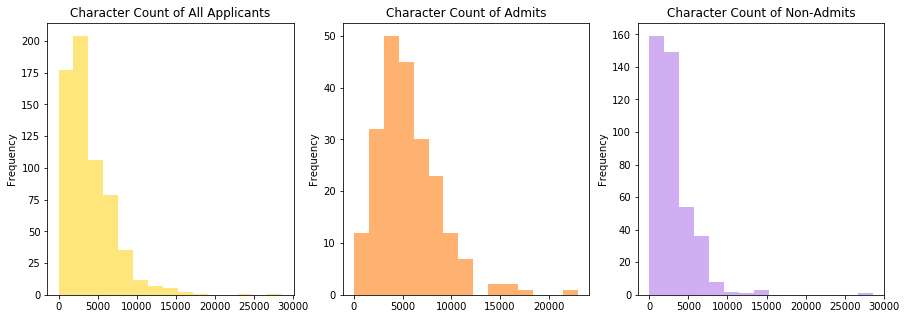

In [85]:
# Histgram of character count for all applicants
fig, axs = plt.subplots(1,3,figsize=(15,5))
df_admit = df[df["Year 2018 Applications Admitted"].str.contains("Product College")]
df_nonadmit = df[~df["Year 2018 Applications Admitted"].str.contains("Product College")]

df["PC Character Count_y"].plot.hist(bins=15, ax=axs[0], color="#ffe67c").set_title("Character Count of All Applicants")
df_admit["PC Character Count_y"].plot.hist(bins=15, ax=axs[1], color="#ffb16f").set_title("Character Count of Admits")
df_nonadmit["PC Character Count_y"].plot.hist(bins=15, ax=axs[2], color="#cfaef2").set_title("Character Count of Non-Admits")

Visually different, but is it true?

## T test!

In [63]:
# One Sided Two Sample T Test: Admitted Group and Non-Admitted Group have difference in character count?
# Independent (unpaird) two-sample location test with a null hypothesis that 
# the means of the two samples are equal (equal variance assued).

# H0: x̄1 = x̄2, or x̄2 - x̄1 = 0, No difference between two groups
# H1: There's a difference
# α = 0.05

import scipy.stats as stats 

x1 = df_admit["PC Character Count_y"]
x2 = df_nonadmit["PC Character Count_y"]
alpha = 0.05

t, p_twosided = stats.ttest_ind(x2.dropna(), x1.dropna(), equal_var=True)
p_onesided = p_twosided / 2

print("P value (One sided): " + str(p_onesided) + ", T value: " + str(t))

if (p_onesided < alpha and t > 0):
    print("Reject Null Hypothesis: There's a difference between two groups and admits has less character counts")
elif (p_onesided < alpha and t < 0): 
    print("Reject Null Hypothesis: There's a difference between two groups and admits has more character counts")
else:
    print("Accept Null Hypothesis: There's no difference between two groups")


P value (One sided): 4.645097885351169e-26 T value: -10.975003467810351
Reject Null Hypothesis: There's a difference between two groups and admits has more character counts


_P value (One sided): 4.645097885351169e-26 T value: -10.975003467810351_<br>
_Reject Null Hypothesis: There's a difference between two groups and admits has more character counts_

__Character count shows the difference between non-admits and admits.__

__How about admits vs attendees?__

In [66]:
# Two Sample T test 2: Attending Group and non-attending group
# H0: x̄1 = x̄2, or x̄2 - x̄1 = 0, No difference between two groups
# H1: There's a difference
# α = 0.05

df_attending = df_admit[df_admit["2018 PC Checked-In"] == "Yes"]
df_non_attending = df_admit[df_admit["2018 PC Checked-In"] != "Yes"]

x1 = df_attending["PC Character Count_y"]
x2 = df_non_attending["PC Character Count_y"]
alpha = 0.05

t, p_twosided = stats.ttest_ind(x2.dropna(), x1.dropna(), equal_var=True)

print("P Value (Two Sided):" + str(p_twosided))

if p_twosided < alpha:
    print("Reject Null Hypothesis: There's a difference between two groups ")
else:
    print("Accept Null Hypothesis: There's no difference between two groups")

P Value (Two Sided):0.26050778614709325
Accept Null Hypothesis: There's no difference between two groups


__There's no difference between two groups (attendees and non-attendees)__

It's not going to help us measure the likelihood to attend..

# Conclusion 1: Character counts help us understand qualified applications, but not the likelihood to attend

# Key Feature 2: Email Opens / Clicks

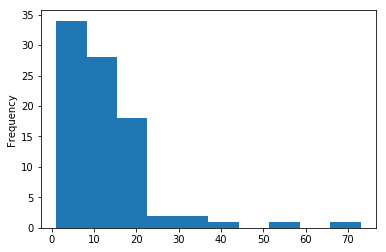

In [17]:
df_attending["Emails Opened"].plot.hist()

# Email Open Rate or Click Rate?

In [18]:
x1 = df_attending["Emails Opened"]
x2 = df_non_attending["Emails Opened"]
alpha = 0.05

t, p_twosided = stats.ttest_ind(x2.dropna(), x1.dropna(), equal_var=True)

if p_twosided < alpha:
    print("Reject Null Hypothesis: There's a difference between two groups ")
else:
    print("Accept Null Hypothesis: There's no difference between two groups")

Accept Null Hypothesis: There's no difference between two groups


In [19]:
x1 = df_attending["Emails Clicked"]
x2 = df_non_attending["Emails Clicked"]

t, p_twosided = stats.ttest_ind(x2.dropna(), x1.dropna(), equal_var=True)

if p_twosided < alpha:
    print("Reject Null Hypothesis: There's a difference between two groups ")
else:
    print("Accept Null Hypothesis: There's no difference between two groups")

Accept Null Hypothesis: There's no difference between two groups


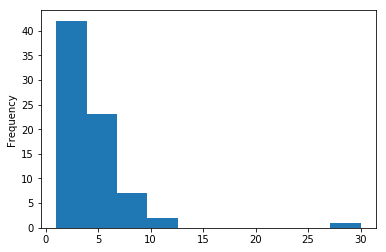

In [20]:
x1.plot.hist()

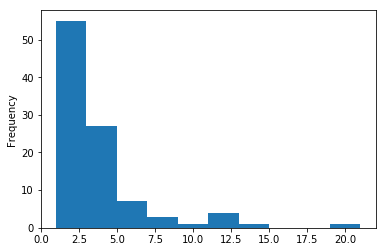

In [21]:
x2.plot.hist()

# Conclution 2: Emails are not telling us whether they will attend or not..

# Key Feature 3: Pageviews and Visits

In [70]:
## Number of Pageviews

x1 = df_attending["Number of Pageviews_y"]
x2 = df_non_attending["Number of Pageviews_y"]

t, p_twosided = stats.ttest_ind(x2.dropna(), x1.dropna(), equal_var=True)

p_onesided = p_twosided / 2

if (p_onesided < alpha and t > 0):
    print("Reject Null Hypothesis: There's a difference between two groups and admits has less page views")
elif (p_onesided < alpha and t < 0): 
    print("Reject Null Hypothesis: There's a difference between two groups and admits has more page views")
else:
    print("Accept Null Hypothesis: There's no difference between two groups")
    
print("P Value: " + str(p_twosided) + ", T:" + str(t))

Reject Null Hypothesis: There's a difference between two groups and admits has more page views
P Value: 1.3114882019395282e-07, T:-5.4595186576950665


In [71]:
## Number of Visits
x1 = df_attending["Number of Visits"]
x2 = df_non_attending["Number of Visits"]

t, p_twosided = stats.ttest_ind(x2.dropna(), x1.dropna(), equal_var=True)
p_onesided = p_twosided / 2

if (p_onesided < alpha and t > 0):
    print("Reject Null Hypothesis: There's a difference between two groups and admits has less visits")
elif (p_onesided < alpha and t < 0): 
    print("Reject Null Hypothesis: There's a difference between two groups and admits has more visite")
else:
    print("Accept Null Hypothesis: There's no difference between two groups")
    
print("P Value: " + str(p_onesided) + ", T:" + str(t))

Reject Null Hypothesis: There's a difference between two groups and admits has more visite
P Value: 1.1965656494351198e-15, T:-8.495809008174783


Text(0.5,1,'Website Visits (Non-Attendees)')

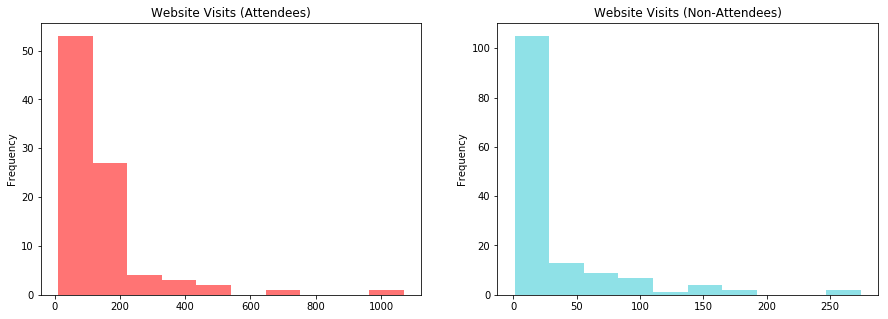

In [83]:
# Histgram of visits
fig, axs = plt.subplots(1,2,figsize=(15,5))

x1.plot.hist(ax=axs[0], color='#ff7474').set_title("Website Visits (Attendees)")
x2.plot.hist(ax=axs[1], color="#8fe1e7").set_title("Website Visits (Non-Attendees)")

Text(0.5,1,'Pageviews (Non-Attendees)')

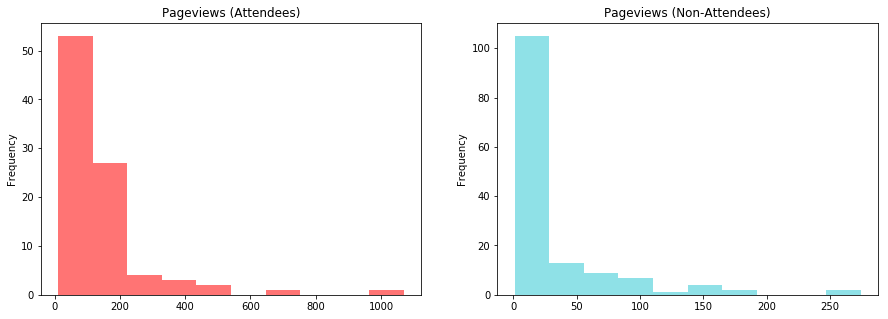

In [84]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

x1.plot.hist(ax=axs[0], color="#ff7474").set_title("Pageviews (Attendees)")
x2.plot.hist(ax=axs[1], color="#8fe1e7").set_title("Pageviews (Non-Attendees)")

# Conclusions
- __Character counts__ helped us qualify applications but not likelihood to attend
- __Email open rate and click rate__ _didn't_ show difference between attendeed and non-attendees
- There are significant difference in __Website visit and page view__ 

# Next Steps
- Use the indicators for Fall 2019
- Find other features which tell us difference between applicants and admits, and attendees

# Special Thanks!
__Fang__: Worked with me during the weekend and taught me math, gave me feedback on my presentation <br>
__Jonathan__: Worked with me during the weekend

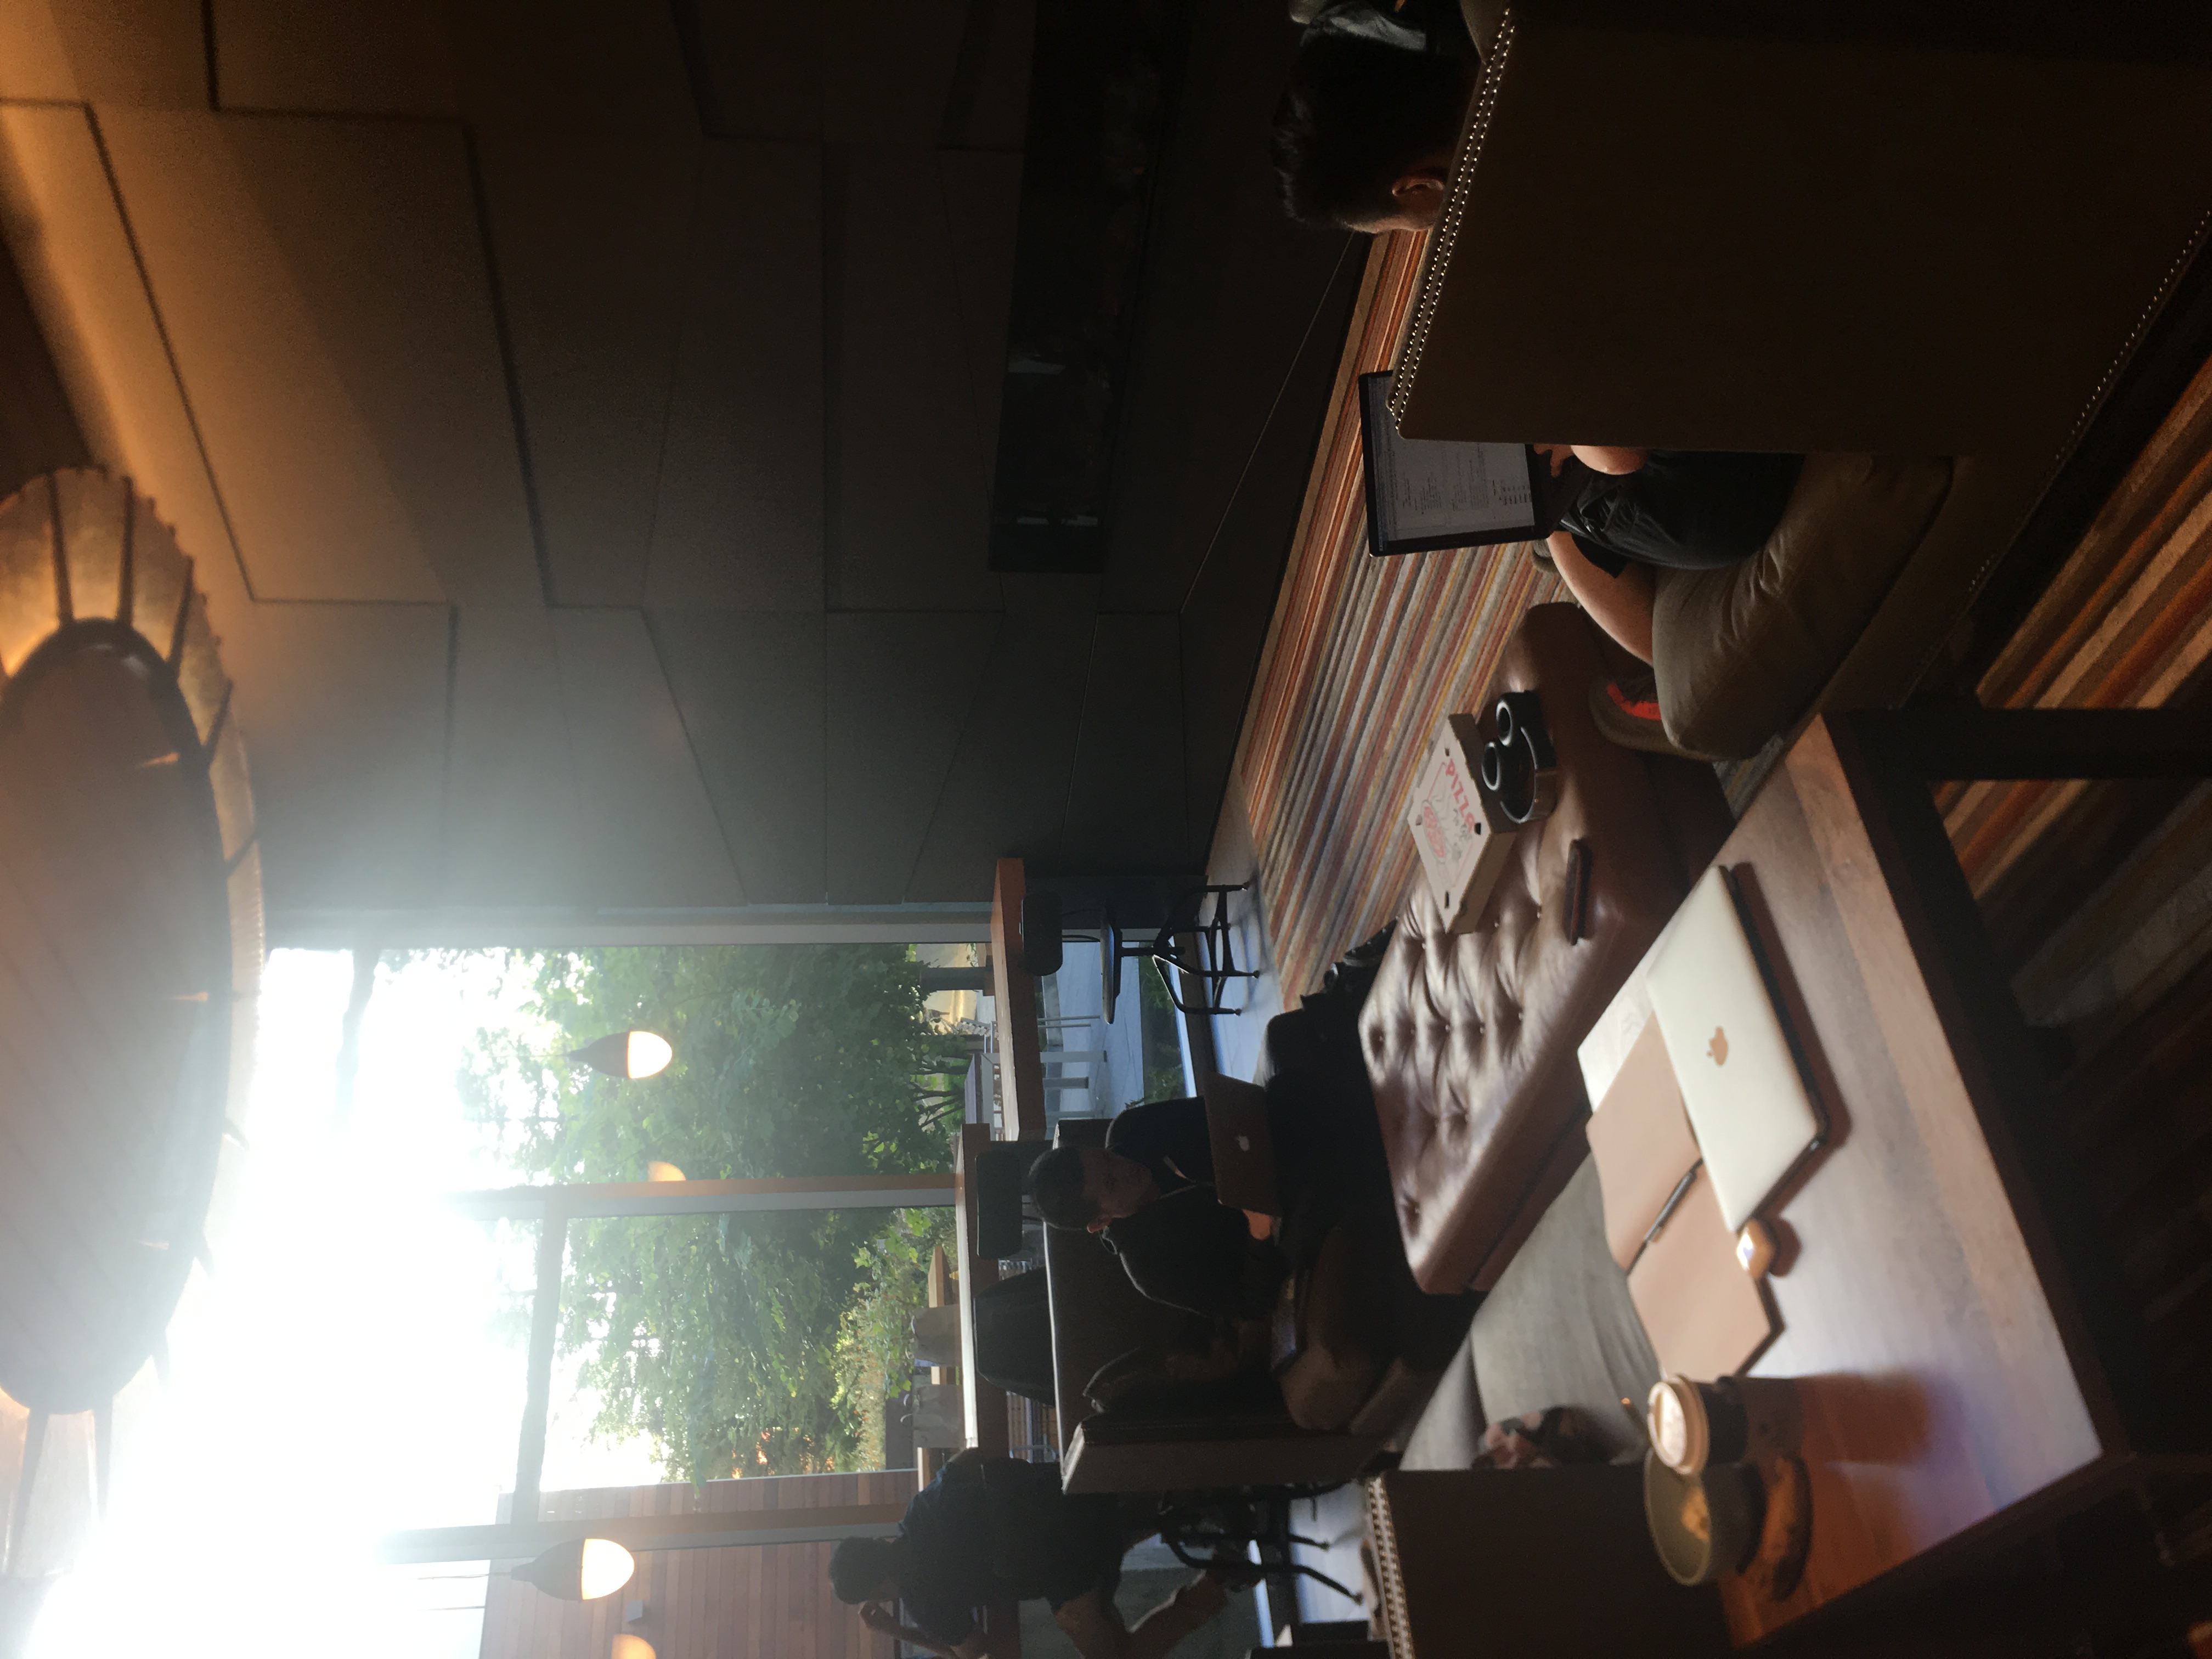

In [87]:
## Another interesting thing! Maybe, the visit to the webiste can be a good indicator
## Note: This data fetched on Sep 6, the orientation might be affected..

In [29]:
x1 = df_attending["Checked in to the Product College Preview Weekend"].apply(lambda x: 0 if pd.isnull(x) else 1)
x2 = df_non_attending["Checked in to the Product College Preview Weekend"].apply(lambda x: 0 if pd.isnull(x) else 1)

t, p_twosided = stats.ttest_ind(x2.dropna(), x1.dropna(), equal_var=True)

if p_twosided < alpha:
    print("Reject Null Hypothesis: There's a difference between two groups ")
else:
    print("Accept Null Hypothesis: There's no difference between two groups")
    
# where can I find a attendance list of April Preview Weekend?

Reject Null Hypothesis: There's a difference between two groups 


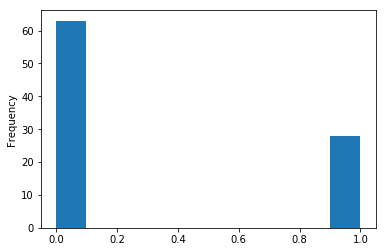

In [30]:
x1.plot.hist()

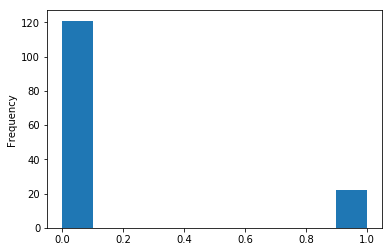

In [31]:
x2.plot.hist()

In [32]:
# Self Reported
# 2018 - "Would you attend Product College" (Self-Reported)

x1 = df_attending['2018 - "Would you attend Product College" (Self-Reported)']
x2 = df_non_attending['2018 - "Would you attend Product College" (Self-Reported)']

x1 = x1.apply(lambda x: 3 if x == "Yes" else (4 if x == "Yes, definitely" else (2 if x == "Yes, but only if logistics work out" else (1 if x == "Still need time to decide" else np.nan))))
x2 = x2.apply(lambda x: 3 if x == "Yes" else (4 if x == "Yes, definitely" else (2 if x == "Yes, but only if logistics work out" else (1 if x == "Still need time to decide" else np.nan))))

t, p_twosided = stats.ttest_ind(x2.dropna(), x1.dropna(), equal_var=True)

if p_twosided < alpha:
    print("Reject Null Hypothesis: There's a difference between two groups ")
else:
    print("Accept Null Hypothesis: There's no difference between two groups")

Reject Null Hypothesis: There's a difference between two groups 


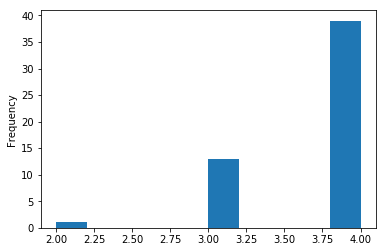

In [33]:
x1.plot.hist()

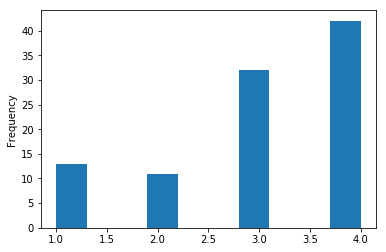

In [34]:
x2.plot.hist()

In [35]:
## Answers "Still need time to decide" & "Yes, but only if logistics work out" show the likelihood for non-attendees
## Visualization can be better..

In [36]:
# Time Duration

In [37]:
df['Became "Started Application" Date'] = pd.to_datetime(df['Became "Started Application" Date'])
df['Became "PC Year 2018 Applications Submitted" Date'] = pd.to_datetime(df['Became "PC Year 2018 Applications Submitted" Date'])
df['Became "PC Year 2018 Applications Admitted" Date'] = pd.to_datetime(df['Became "PC Year 2018 Applications Admitted" Date'])

In [38]:
df["Duration from draft to application"] = df['Became "PC Year 2018 Applications Submitted" Date'] - df['Became "Started Application" Date']

In [39]:
df["Duration from draft to application"] = df["Duration from draft to application"].dt.days

In [40]:
df['Duration from 2017-08-01'] = df['Became "Started Application" Date'] - pd.to_datetime("2017-08-01")
df['Duration from 2017-08-01'] = df['Duration from 2017-08-01'].dt.days

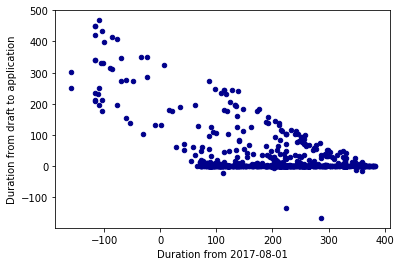

In [41]:
## Plots - Relashons between when they submitted and when they started application
ax1 = df.plot.scatter(x='Duration from 2017-08-01', y='Duration from draft to application',c='DarkBlue')

In [42]:
# How long it took until they started enrolling?
df['Became "PC Year 2018 Completed Enrollment Survey" Date'] = pd.to_datetime(df['Became "PC Year 2018 Completed Enrollment Survey" Date'])
df['Became "PC Year 2018 paid deposit" Date'] = pd.to_datetime(df['Became "PC Year 2018 paid deposit" Date'])
df['Became "PC Year 2018 Applications Drafts" Date'] = pd.to_datetime(df['Became "PC Year 2018 Applications Drafts" Date'])
df['Became "PC Year 2018 Signed Enrollment Agreement" Date'] = pd.to_datetime(df['Became "PC Year 2018 Signed Enrollment Agreement" Date'])

# When they submitted affects the likelihood to attend?
# When they started enrolling affecta the likelihood to attend?
# utm campaign - any specific campaign we did well / not well?

In [ ]:
# T test - normalities